In [320]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


crossectional_area = (7 * 40) # luas penampang spesimen dalam milimeter
initial_length = 200 # panjang awal spesimen dalam milimeter

In [321]:

# Membaca file CSV dengan melewati baris pertama dan kedua, serta tanpa header otomatis
data = pd.read_csv("KEL 2A_1.csv", skiprows=[0, 1], header=None)

# Menambahkan nama kolom
data.columns = ['Displacement', 'Force']

# Menghapus tanda kutip dari setiap nilai dalam kolom, jika ada, lalu mengonversi ke float
data['Displacement'] = data['Displacement'].astype(str).str.replace('"', '').astype(float)
data['Force'] = data['Force'].astype(str).str.replace('"', '').astype(float)

# mengubah data force ke dalam N
data['Force'] = data['Force'] * 1000

# Menampilkan hasilnya
print(data)
data.describe()


       Displacement    Force
0            0.0000      6.9
1            0.0000      7.6
2            0.0004     20.5
3            0.0015     96.1
4            0.0025    185.3
...             ...      ...
28817       48.0014  92863.3
28818       48.0015  89082.1
28819       48.0017  85274.6
28820       48.0019  81469.8
28821       48.0021  77686.4

[28822 rows x 2 columns]


,Displacement,Force
count,28822.000000,28822.000000
mean,24.014009,159399.351311
std,13.867216,23094.364877
min,0.000000,6.900000
25%,12.005175,154036.400000
50%,24.014050,167459.750000
75%,36.022725,172728.525000
max,48.002100,173793.700000


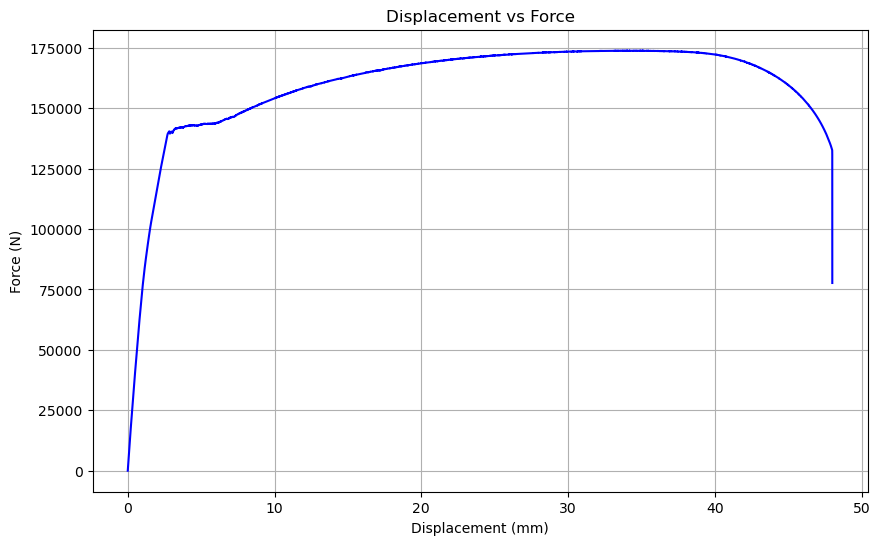

In [322]:
# GRAFIK FORCE-DISPLACEMENT

plt.figure(figsize=(10, 6))
plt.plot(data['Displacement'], data['Force'], marker='o', color='b', linestyle='-', markersize=0.0003)
plt.title("Displacement vs Force")
plt.xlabel("Displacement (mm)")
plt.ylabel("Force (N)")
plt.grid(True)
plt.show()

           Stress    Strain
0        0.024643  0.000000
1        0.027143  0.000000
2        0.073214  0.000002
3        0.343214  0.000008
4        0.661786  0.000013
...           ...       ...
28817  331.654643  0.240007
28818  318.150357  0.240008
28819  304.552143  0.240008
28820  290.963571  0.240009
28821  277.451429  0.240010

[28822 rows x 2 columns]


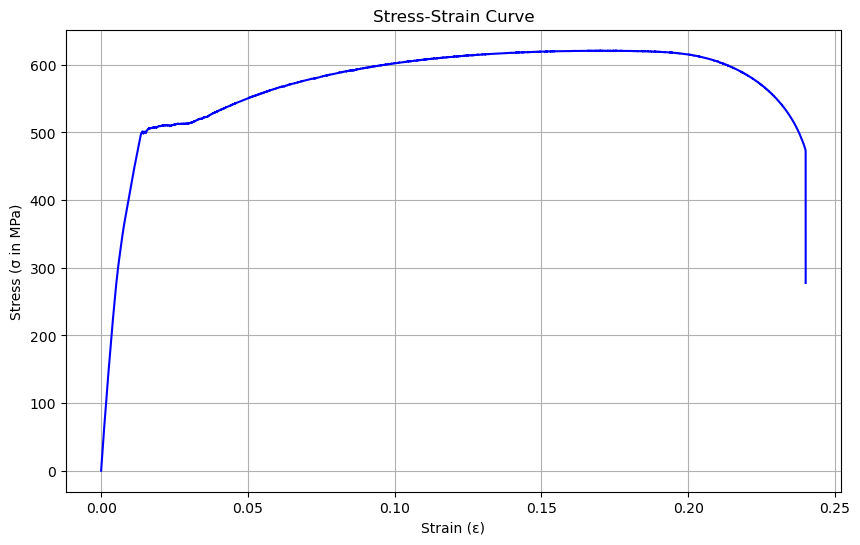

In [323]:
# GRAFIK STRESS-STRAIN


# mendapatkan data stress dan strain
stress = data["Force"]/crossectional_area
strain = (data["Displacement"])/initial_length

# memasukkan data stress dan strain ke dalam dataframe baru
stress_strain = pd.DataFrame({'Stress':stress,'Strain':strain})


print(stress_strain)


plt.figure(figsize=(10, 6))
plt.plot(stress_strain['Strain'], stress_strain['Stress'], marker='o', color='b', linestyle='-', markersize=0.0001)
plt.xlabel("Strain (ɛ)")
plt.ylabel("Stress (σ in MPa)")
plt.title("Stress-Strain Curve")
plt.grid(True)
plt.show()

In [324]:

print(stress_strain.max())


Stress    620.691786
Strain      0.240010
dtype: float64


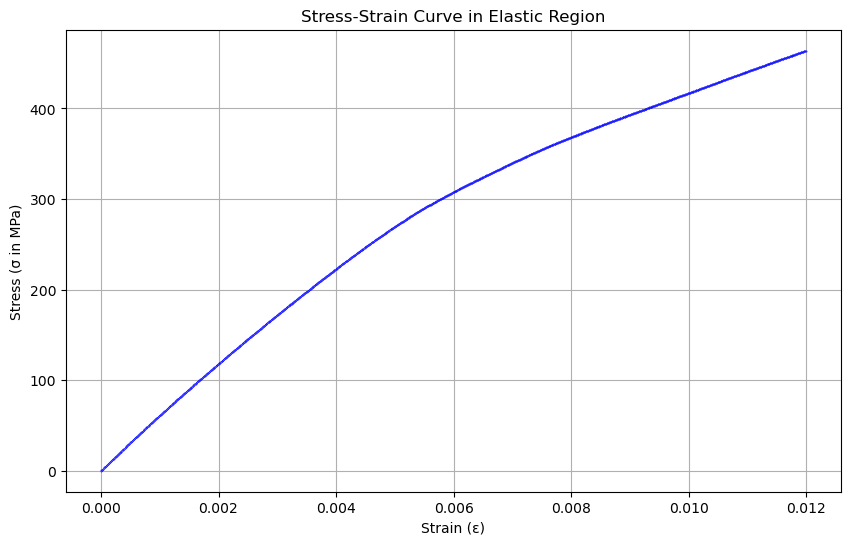

In [325]:
# GRAFIK DAERAH ELASTIS

elastic_region2 = stress_strain.loc[(stress_strain['Strain'] > 0.0000001) & (stress_strain['Strain']<0.012)]

plt.figure(figsize=(10, 6))
plt.plot(elastic_region2['Strain'], elastic_region2['Stress'], 'bo', label="Data Elastic Region", markersize=0.3)
plt.xlabel("Strain (ɛ)")
plt.ylabel("Stress (σ in MPa)")
plt.title("Stress-Strain Curve in Elastic Region")
plt.grid(True)
plt.show()

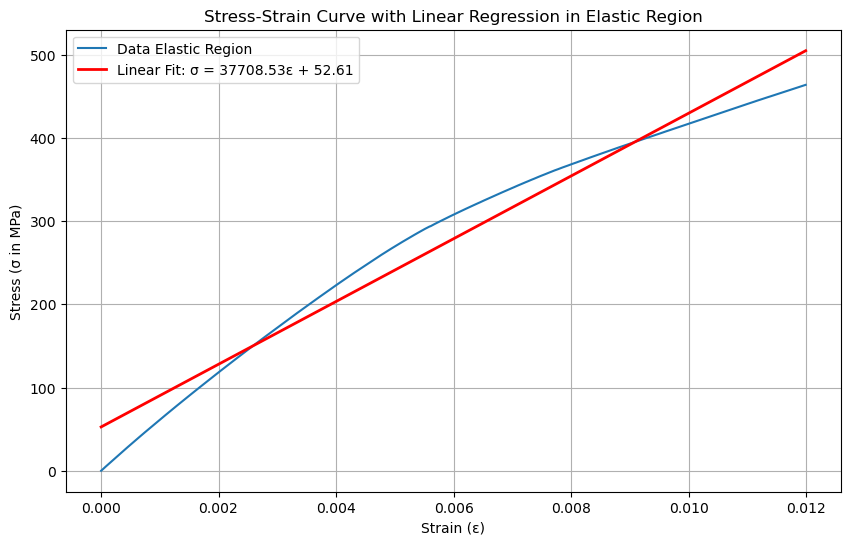

Slope (Elastic Modulus) = 37708.53 MPa
37708.53389456681


In [326]:
# REGRESI LINEAR UNTUK DAERAH ELASTIS

# Melakukan regresi linear pada data elastis
slope, intercept = np.polyfit(elastic_region2['Strain'], elastic_region2['Stress'], 1)

# Menghitung nilai Stress yang diprediksi dari hasil regresi linear
stress_fit = slope * elastic_region2['Strain'] + intercept

# Plot data asli dan garis regresi linear
plt.figure(figsize=(10, 6))
plt.plot(elastic_region2['Strain'], elastic_region2['Stress'], label="Data Elastic Region", markersize=2)
plt.plot(elastic_region2['Strain'], stress_fit, 'r-', label=f"Linear Fit: σ = {slope:.2f}ε + {intercept:.2f}", linewidth=2)

# Menambahkan label dan judul
plt.xlabel("Strain (ɛ)")
plt.ylabel("Stress (σ in MPa)")
plt.title("Stress-Strain Curve with Linear Regression in Elastic Region")
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()


elastic_modulus = slope
# Menampilkan hasil slope dan intercept
print(f"Slope (Elastic Modulus) = {slope:.2f} MPa")
print(elastic_modulus)



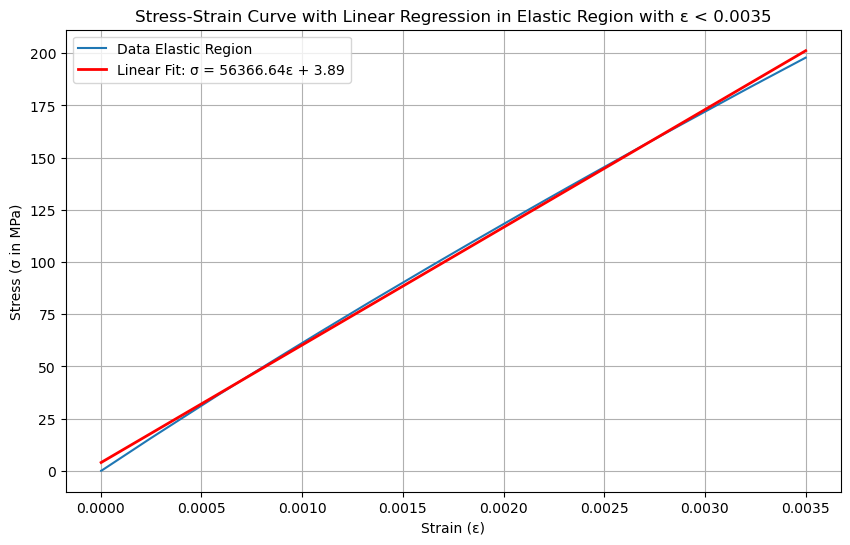

Slope (Elastic Modulus) = 56366.64 MPa


In [327]:
# REGRESI LINEAR UNTUK DAERAH ELASTIS DENGAN LEBIH DETAIL


elastic_region = stress_strain.loc[(stress_strain['Strain'] > 0.000001) & (stress_strain['Strain']<0.0035)]
elastic_region.describe()


# Melakukan regresi linear pada data elastis
slope, intercept = np.polyfit(elastic_region['Strain'], elastic_region['Stress'], 1)

# Menghitung nilai Stress yang diprediksi dari hasil regresi linear
stress_fit = slope * elastic_region['Strain'] + intercept

# Plot data asli dan garis regresi linear
plt.figure(figsize=(10, 6))
plt.plot(elastic_region['Strain'], elastic_region['Stress'], label="Data Elastic Region", markersize=2)
plt.plot(elastic_region['Strain'], stress_fit, 'r-', label=f"Linear Fit: σ = {slope:.2f}ε + {intercept:.2f}", linewidth=2)

# Menambahkan label dan judul
plt.xlabel("Strain (ɛ)")
plt.ylabel("Stress (σ in MPa)")
plt.title("Stress-Strain Curve with Linear Regression in Elastic Region with ɛ < 0.0035")
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

# Menampilkan hasil slope dan intercept
print(f"Slope (Elastic Modulus) = {slope:.2f} MPa")
elastic_modulus2 = slope

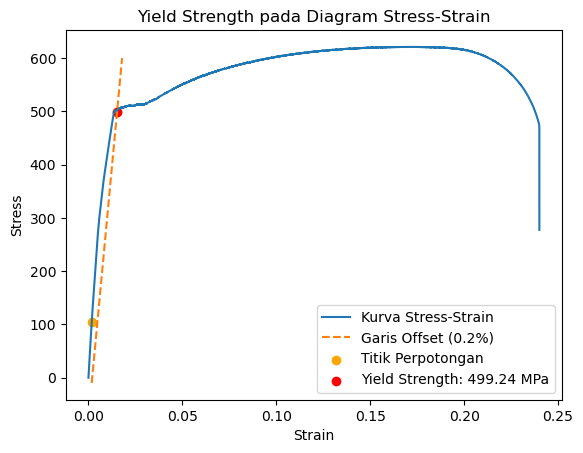

Yield Strength ditemukan pada Stress sekitar 499.24 MPa, pada Strain sekitar 0.015241.


In [328]:
# MENCARI PERPOTONGAN YIELD STRENGTH DENGAN OFFSET 0.002


# Buat salinan DataFrame
stress_strain_offset = stress_strain.copy()

# Menentukan persamaan garis linear yang di-offset dengan strain 0.002
m = 37708.53389456681  # 
offset_strain = -0.002
stress_strain_offset['Stress_offset'] = m * (stress_strain_offset['Strain'] + offset_strain)

# Membatasi garis offset di bawah 600 MPa
stress_strain_offset = stress_strain_offset[( stress_strain_offset['Stress_offset'] >= -10) & (stress_strain_offset['Stress_offset'] <= 600)]

# Mencari perpotongan antara Stress (kurva) dan Stress_offset (garis offset)
stress_strain_offset['difference'] = stress_strain_offset['Stress'] - stress_strain_offset['Stress_offset']
stress_strain_offset['sign_change'] = np.sign(stress_strain_offset['difference'])
stress_strain_offset['sign_change_shift'] = stress_strain_offset['sign_change'].shift()

# Menemukan indeks di mana terjadi perubahan tanda untuk titik perpotongan
intersection_indices = stress_strain_offset[stress_strain_offset['sign_change'] != stress_strain_offset['sign_change_shift']].index

# Mengumpulkan semua titik perpotongan
intersections = []
for idx in intersection_indices:
    x_intersect = stress_strain_offset['Strain'][idx]
    y_intersect = stress_strain_offset['Stress'][idx]
    intersections.append((x_intersect, y_intersect))

# Memilih titik perpotongan dengan nilai stress terbesar sebagai yield strength
if intersections:
    max_yield_strength_point = max(intersections, key=lambda point: point[1])
    yield_strength_strain, yield_strength_stress = max_yield_strength_point
else:
    yield_strength_stress = None

# Plot kurva asli, garis offset, dan semua titik perpotongan
plt.plot(stress_strain['Strain'], stress_strain['Stress'], label='Kurva Stress-Strain')
plt.plot(stress_strain_offset['Strain'], stress_strain_offset['Stress_offset'], label='Garis Offset (0.2%)', linestyle='--')
for x, y in intersections:
    plt.scatter(x, y, color='orange', label='Titik Perpotongan' if x == intersections[0][0] else "")
if yield_strength_stress is not None:
    plt.scatter(yield_strength_strain, yield_strength_stress, color='red', label=f'Yield Strength: {yield_strength_stress:.2f} MPa')

plt.xlabel('Strain')
plt.ylabel('Stress')
plt.legend()
plt.title('Yield Strength pada Diagram Stress-Strain')
plt.show()

# Menampilkan nilai yield strength
print(f"Yield Strength ditemukan pada Stress sekitar {yield_strength_stress:.2f} MPa, pada Strain sekitar {yield_strength_strain:.6f}.")

       True Stress  True Strain
0         0.024643     0.000000
1         0.027143     0.000000
2         0.073214     0.000002
3         0.343217     0.000007
4         0.661794     0.000012
...            ...          ...
28817   411.254079     0.215117
28818   394.508829     0.215117
28819   377.647246     0.215118
28820   360.797593     0.215119
28821   344.042685     0.215120

[28822 rows x 2 columns]


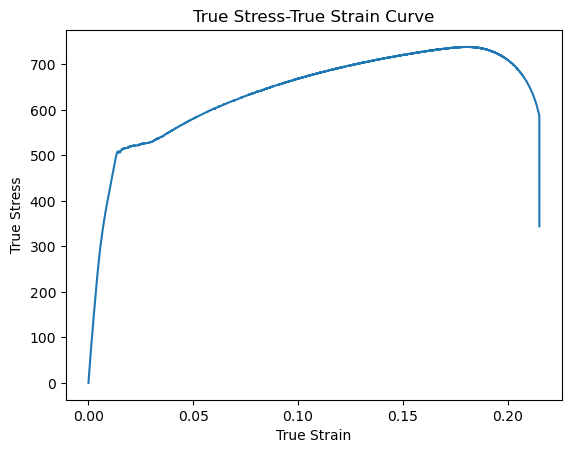

In [329]:
# KURVA TRUE STRESS-TRUE STRAIN

true_stress = stress_strain['Stress'] * (1 + stress_strain['Strain'])
true_strain = np.log(1 + stress_strain['Strain'])

true_stress_strain = pd.DataFrame({'True Stress':true_stress,'True Strain':true_strain})

print(true_stress_strain)
plt.plot(true_stress_strain['True Strain'], true_stress_strain['True Stress'])
plt.xlabel('True Strain')
plt.ylabel('True Stress')
plt.title('True Stress-True Strain Curve')
plt.show()

       True Stress  True Strain
6155    580.740476     0.050002
6156    580.830578     0.050011
6157    580.896276     0.050020
6158    580.894689     0.050027
6159    580.852750     0.050034
...            ...          ...
20819   728.231980     0.159969
20820   728.272770     0.159976
20821   728.245464     0.159983
20822   728.176883     0.159989
20823   728.176818     0.159996

[14669 rows x 2 columns]


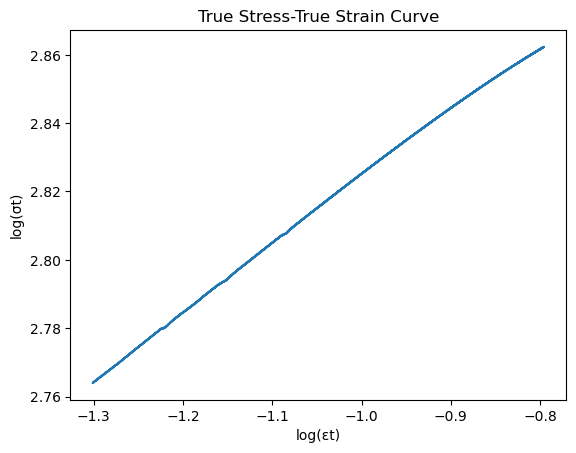

In [330]:
true_stress_strain = true_stress_strain.loc[(true_stress_strain ['True Strain'] > 0.05) & (true_stress_strain['True Strain']<0.16)]

print(true_stress_strain)

true_stress_strain['True Strain'] = np.log10(true_stress_strain['True Strain'])
true_stress_strain['True Stress'] = np.log10(true_stress_strain['True Stress'])


plt.plot(true_stress_strain['True Strain'], true_stress_strain['True Stress'])
plt.xlabel('log(ɛt)')
plt.ylabel('log(σt)')
plt.title('True Stress-True Strain Curve')
plt.show()



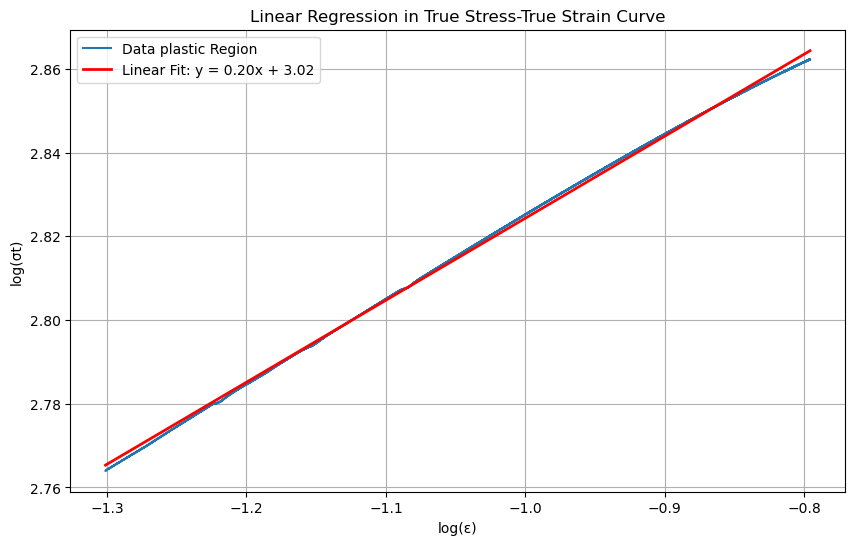

Slope (constantK) = 0.20 MPa


In [331]:
# REGRESI LINEAR UNTUK DAERAH ELASTIS DENGAN LEBIH DETAIL


true_stress_strain
# Melakukan regresi linear pada data elastis
slope, intercept = np.polyfit(true_stress_strain['True Strain'], true_stress_strain['True Stress'], 1)

# Menghitung nilai Stress yang diprediksi dari hasil regresi linear
stress_fit = slope * true_stress_strain['True Strain'] + intercept

# Plot data asli dan garis regresi linear
plt.figure(figsize=(10, 6))
plt.plot(true_stress_strain['True Strain'], true_stress_strain['True Stress'], label="Data plastic Region", markersize=2)
plt.plot(true_stress_strain['True Strain'], stress_fit, 'r-', label=f"Linear Fit: y = {slope:.2f}x + {intercept:.2f}", linewidth=2)

# Menambahkan label dan judul
plt.xlabel("log(ɛ)")
plt.ylabel("log(σt)")
plt.title("Linear Regression in True Stress-True Strain Curve")
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()

# Menampilkan hasil slope dan intercept
print(f"Slope (constantK) = {slope:.2f} MPa")
constantK = slope